<a href="https://colab.research.google.com/github/hvyrain/colab-R/blob/master/R_template_korean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ggplot에서 한글 폰트 사용하기
- 나눔폰트 종류
'NanumGothic'
'NanumGothicCoding'
'NanumGothic Eco'
'NanumGothic Eco ExtraBold'
'NanumGothicExtraBold'
'NanumGothic Light'
'NanumBarunGothic'
'NanumBarunGothic Light'
'NanumBarunGothic UltraLight'
'NanumBarunpen'
'NanumBarunpen Bold'
'Nanum Brush Script'
'NanumMyeongjo'
'NanumMyeongjo Eco'
'NanumMyeongjo Eco ExtraBold'
'NanumMyeongjoExtraBold'
'Nanum Pen Script'
'NanumSquare Bold'
'NanumSquare ExtraBold'
'NanumSquare Light'
'NanumSquare'
'NanumSquareRound Bold'
'NanumSquareRound ExtraBold'
'NanumSquareRound Light'
'NanumSquareRound Regular'

In [1]:
system("apt-get install fonts-nanum*")

In [2]:
install.packages(c("ggplot2", "ggthemes","extrafont"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’




In [3]:
suppressPackageStartupMessages({
library(ggplot2)
library(ggthemes)
library(extrafont)
})

In [4]:
font_import(pattern="Nanum")

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
Warning message in system2(ttf2pt1, c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' '/tmp/Rtmp0H146M/fonts/NanumBarunGothic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
Warning message in system2(ttf2pt1, c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf' '/tmp/Rtmp0H146M/fonts/NanumBarunGothicBold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
Warning message in system2(ttf2pt1, c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running comm

In [5]:
fonts()

NULL

In [6]:
dt <- data.frame(x=1:100, y=rnorm(100))

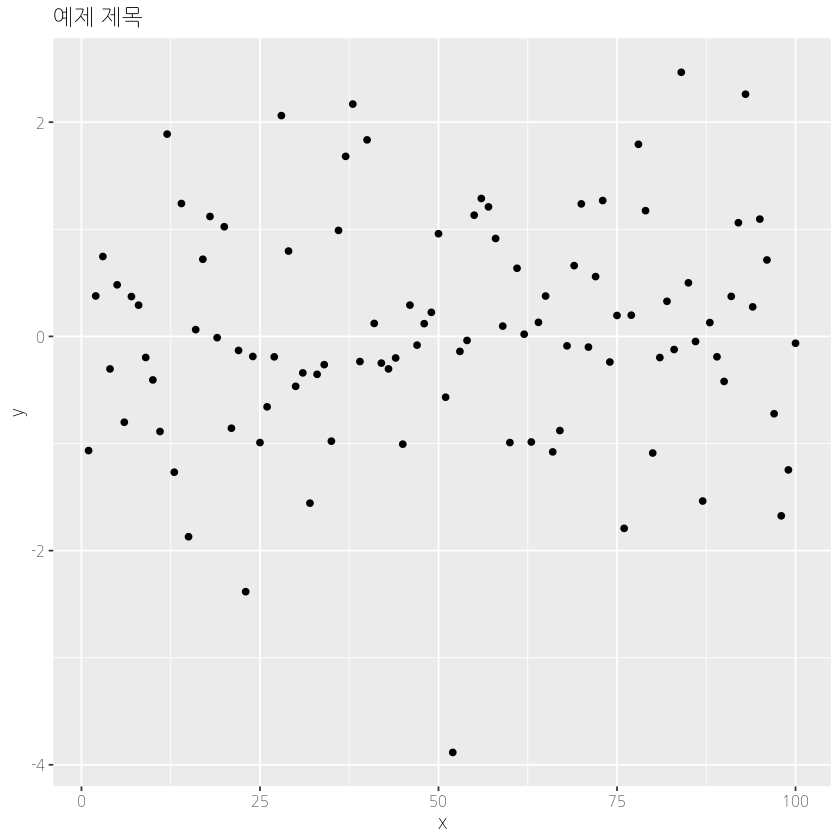

In [7]:
# 첫 번째 방법 : theme_update 사용
theme_update(text=element_text(family="NanumGothic Light"))
ggplot(data=dt) + geom_point(mapping=aes(x=x, y=y)) + ggtitle("예제 제목")

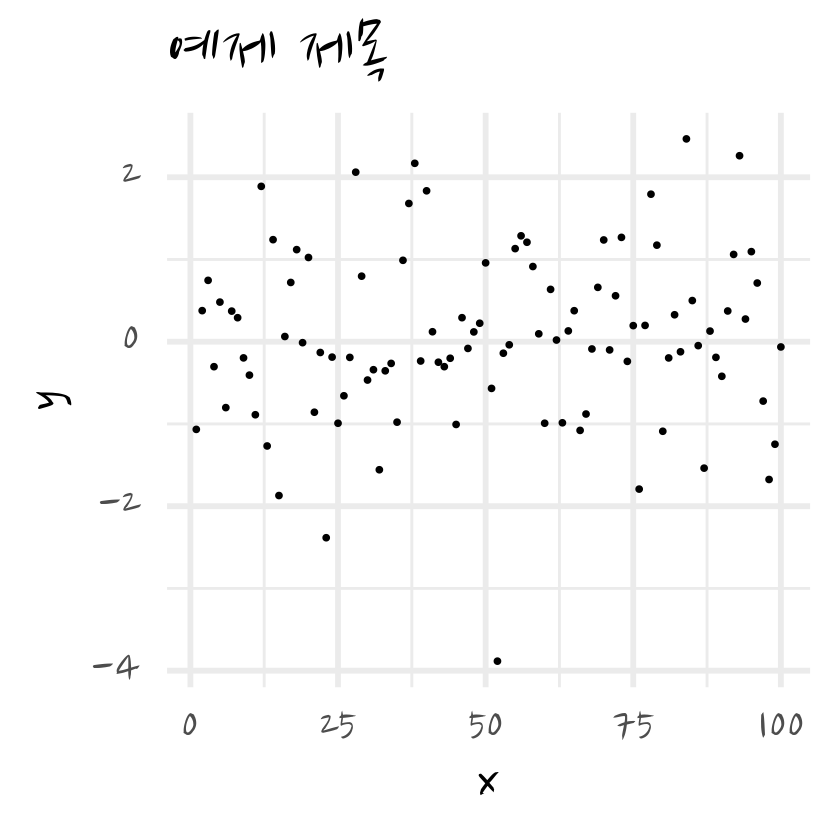

In [8]:
# 두 번째 방법 : theme_minimal 사용
ggplot(data=dt) +
  geom_point(mapping=aes(x=x, y=y)) +
  ggtitle("예제 제목") +
  theme_minimal(base_family="Nanum Brush Script", base_size=36)

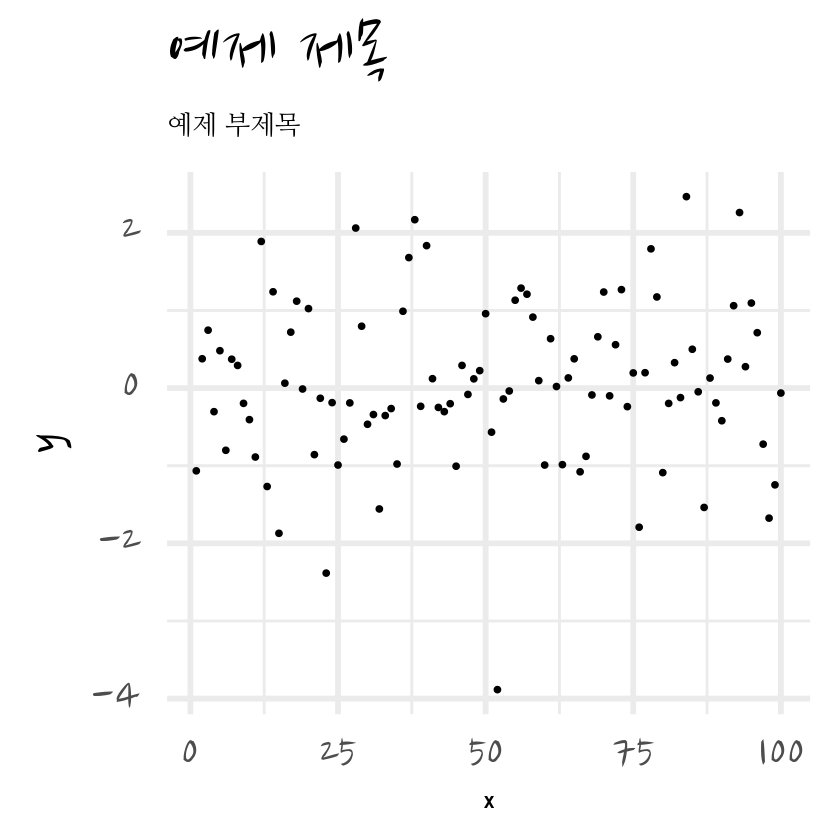

In [9]:
  # 글꼴 섞기, theme 사용 : https://ggplot2.tidyverse.org/reference/theme.html
  ggplot(data=dt) +
  geom_point(mapping=aes(x=x, y=y)) +
  ggtitle("예제 제목","예제 부제목") +
  theme_minimal(base_family="Nanum Brush Script", base_size=36) +
  theme(plot.subtitle=element_text(family="NanumMyeongjo",size=16)) +
  theme(axis.title.x=element_text(family="NanumGothicExtraBold", size=12))

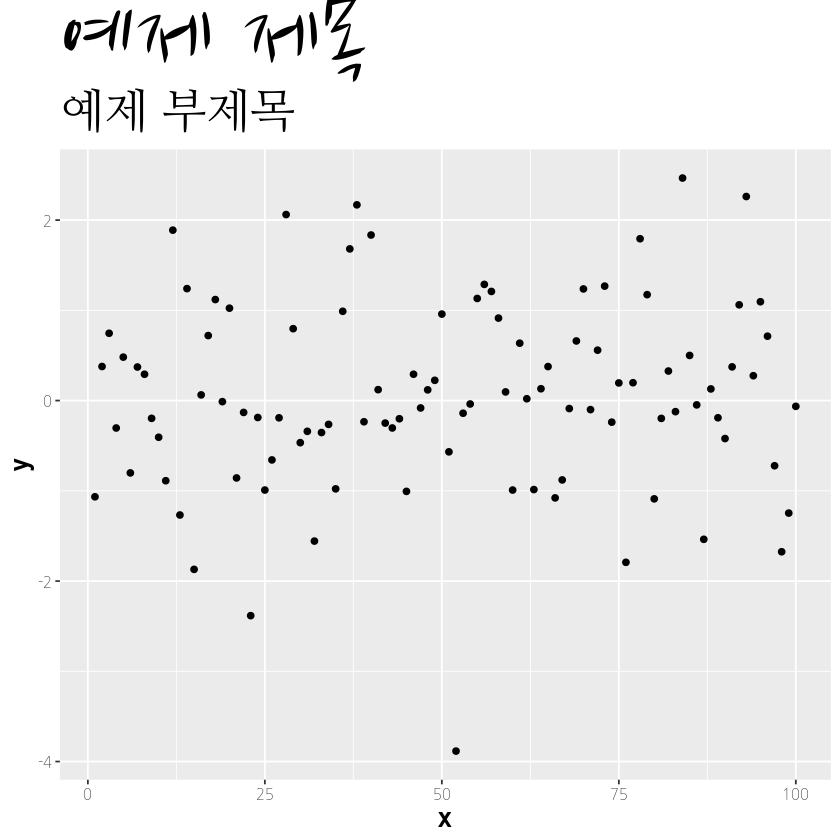

In [10]:
  # theme로 한 번에 다른 글꼴들을 지정
  t <- theme(plot.title=element_text(family="Nanum Brush Script",size=60), 
             plot.subtitle=element_text(family="NanumMyeongjo",size=28), 
             axis.title.x=element_text(family="NanumGothicExtraBold", size=16),
             axis.title.y=element_text(family="NanumGothicExtraBold", size=16)
            )
  ggplot(data=dt) +
  geom_point(mapping=aes(x=x, y=y)) +
  ggtitle("예제 제목","예제 부제목") + t


In [11]:
dfk <- data.frame(키=rnorm(10, mean=170, sd=10), 몸무게=rnorm(10, mean=65, sd=10))

키,몸무게
<dbl>,<dbl>
188.3151,73.23334
139.7334,72.65205
155.5645,86.94977
171.0662,68.18299
168.7863,62.17534
180.0860,79.19135
184.7424,72.17891
165.5545,47.86475
162.2734,69.03034


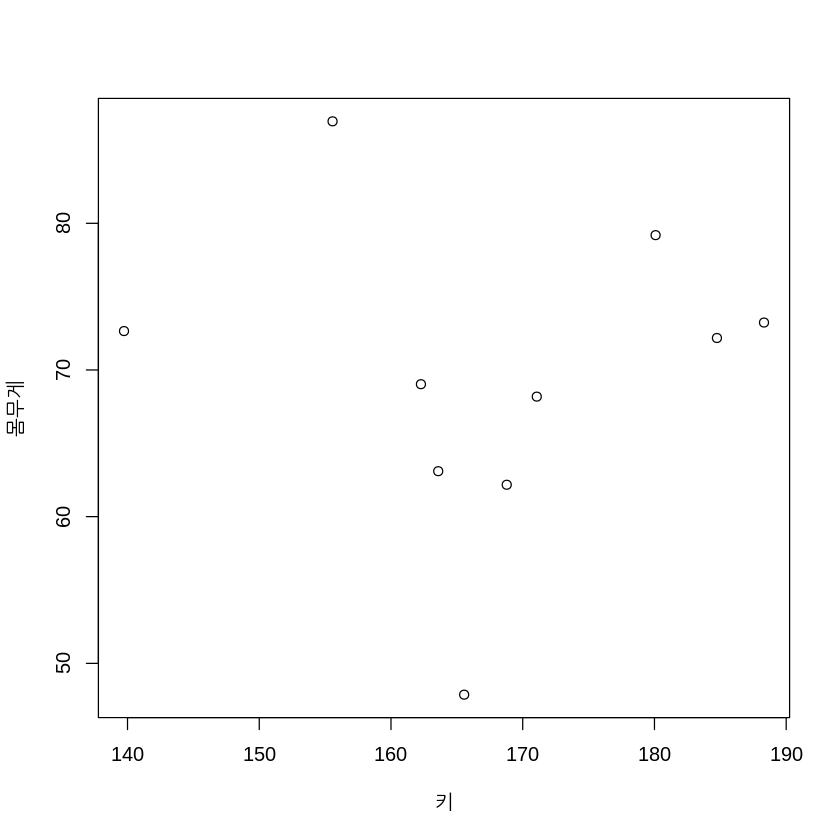

In [12]:
dfk
plot(dfk)

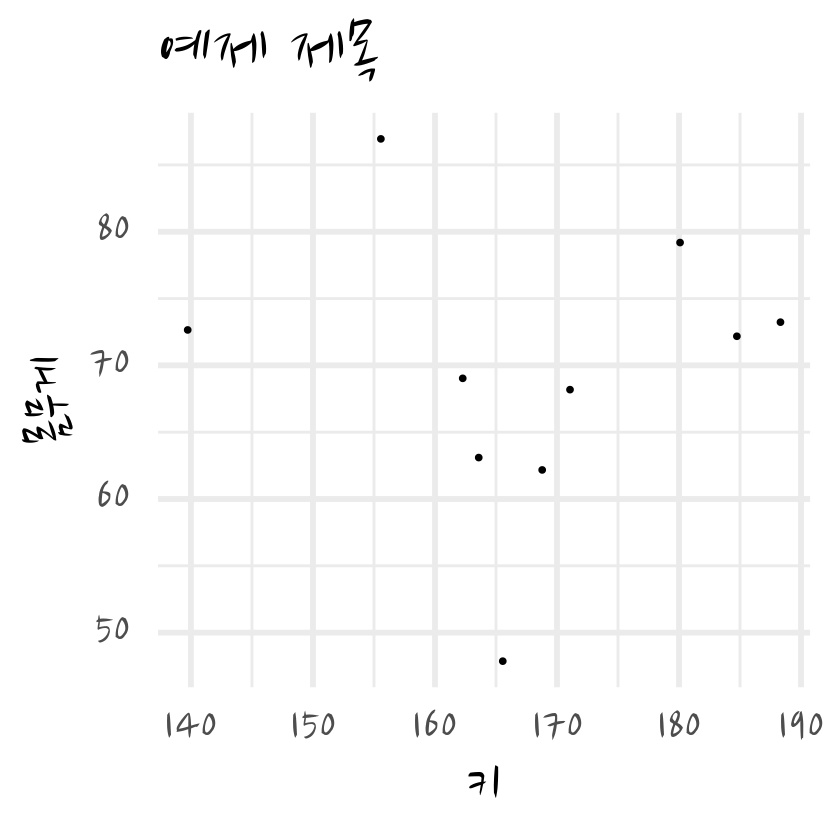

In [13]:
ggplot(data=dfk) +
  geom_point(mapping=aes(x=키, y=몸무게)) +
  ggtitle("예제 제목") +
  theme_minimal(base_family="Nanum Brush Script", base_size=36)

In [14]:
l <- lm(몸무게~키, dfk)
l


Call:
lm(formula = 몸무게 ~ 키, data = dfk)

Coefficients:
(Intercept)           키  
  68.935379     0.003099  


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



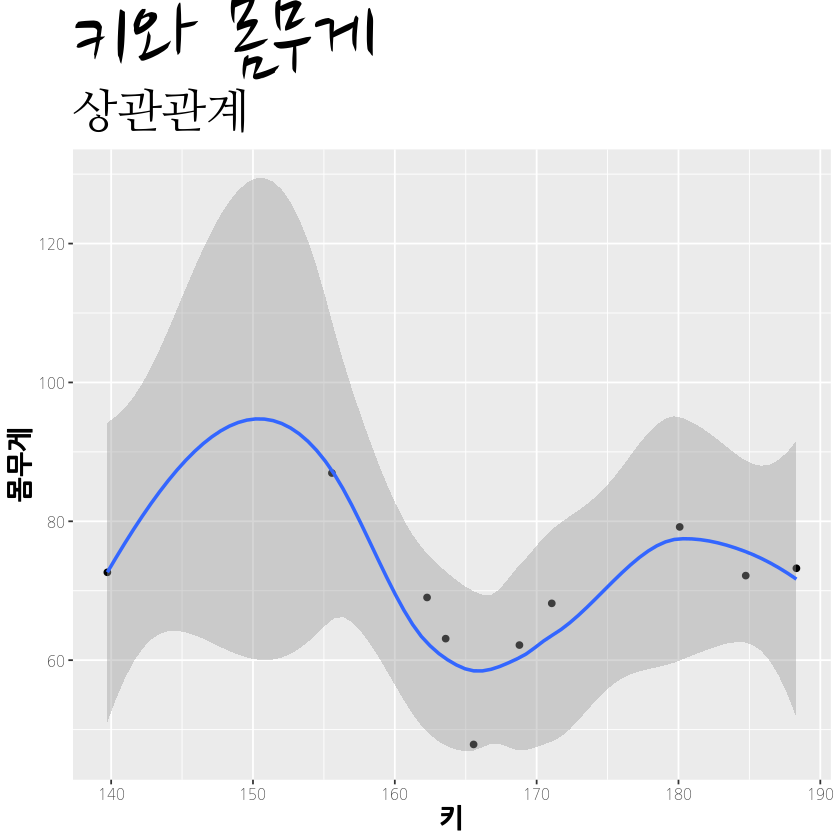

In [16]:
  t <- theme(plot.title=element_text(family="Nanum Brush Script",size=60), 
             plot.subtitle=element_text(family="NanumMyeongjo",size=28), 
             axis.title.x=element_text(family="NanumGothicExtraBold", size=16),
             axis.title.y=element_text(family="NanumGothicExtraBold", size=16)
            )
  ggplot(data=dfk) +
  geom_point(mapping=aes(x=키, y=몸무게)) +
  ggtitle("키와 몸무게","상관관계") + 
  geom_smooth(mapping=aes(x=키, y=몸무게)) + t

# 웹폰트 사용
- https://kuduz.tistory.com/1101
- https://danbi-ncsoft.github.io/etc/2018/07/24/use-your-font-in-r.html
- 웹폰트 : https://fonts.google.com/
- R Studio에서 동작함(cloud에서는 안됨).

In [ ]:
install.packages('showtext')
library('showtext')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
font_add_google('Nanum Pen Script', 'nanumpen')

In [ ]:
showtext_auto()

In [ ]:
library(ggplot2)
{fig.showtext=TRUE}

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'NanumGothic Light' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family

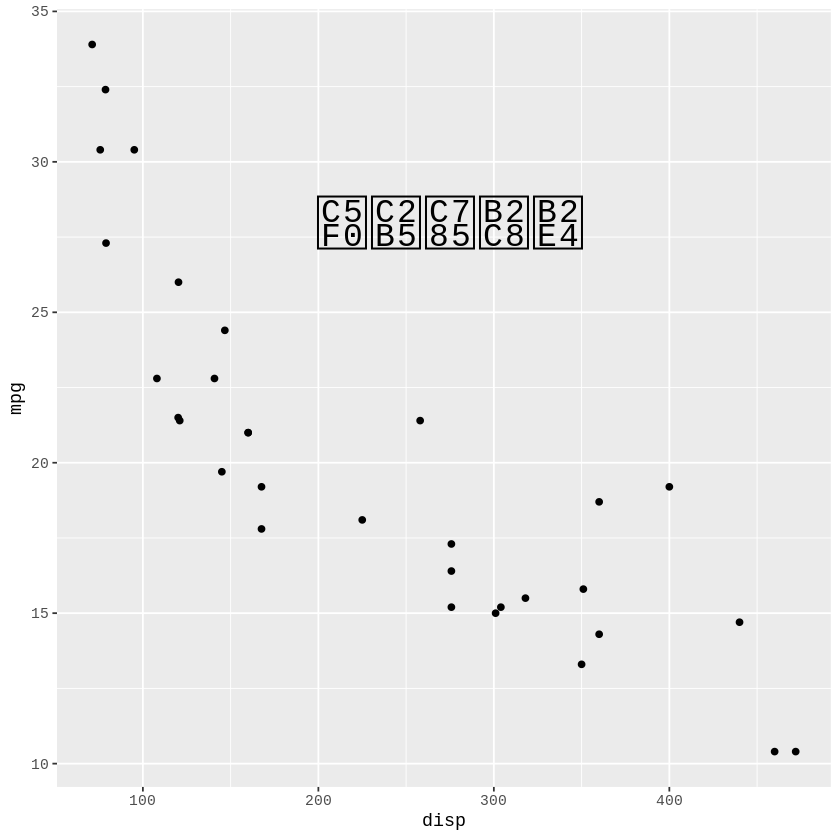

In [ ]:
p <- ggplot(data=mtcars, aes(x=disp, y=mpg)) + geom_point()
p + annotate(geom='text', x=275, y=28, size=15, family='nanumpen', label='연습입니다')

In [ ]:
font_add('ink',file.choose())

ERROR: ignored

In [ ]:
system("wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip", intern=TRUE)

In [ ]:
system("ls", intern=TRUE)

[1] "NanumFont_TTF_ALL.zip" "sample_data"

In [ ]:
system("unzip NanumFont_TTF_ALL.zip -d NanumFont")

In [ ]:
font_add("nanumgothic", "NanumFont/NanumGothic.ttf")

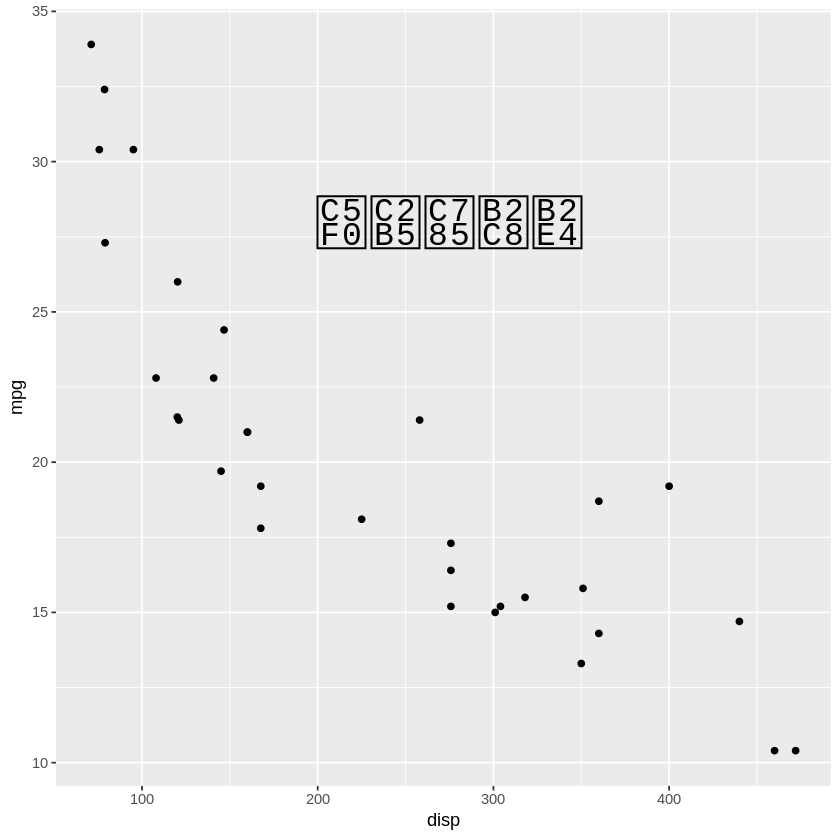

In [ ]:
p <- ggplot(data=mtcars, aes(x=disp, y=mpg)) + geom_point()
p + annotate(geom='text', x=275, y=28, size=15, family='nanumgothic', label='연습입니다')